# Walmart Case Study
by Shashank Gupta


Dataset link - https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094


Collab Link- https://colab.research.google.com/drive/1sxEzmi7gPT2TQRKoFkKWRqQvPOqqlksz#scrollTo=n7RdCRmFwf79

# Walmart

### About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### Objective
 In this analysis, we try to find out the effect of different user types on Purchase.

In [ ]:
# loading dataset in collab
!wget --no-check-certificate https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O Walmart.csv


--2025-01-30 20:08:15--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.110, 18.164.173.117, 18.164.173.58, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘Walmart.csv’

Walmart.csv         100%[===================>]  21.96M  --.-KB/s    in 0.1s    

2025-01-30 20:08:15 (182 MB/s) - ‘Walmart.csv’ saved [23027994/23027994]



In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading dataset
walmart_df = pd.read_csv('Walmart.csv')
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# checking for structure of data
walmart_df.shape

(550068, 10)

This tell that the total data entries are 550068 (0.55 million) with 10 features.


In [ ]:
walmart_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
walmart_df.describe(include= object)


,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
walmart_df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


This shows that there are no null values in the data.







In [ ]:
 #checking for no of unique values in each feature and displaying the count with the values
for col in walmart_df.columns:
  # No of unique values in each column
  print(f"Number of unique values in feature '{col}': {walmart_df[col].nunique()}")

  # Displaying unique values in different features
  print(f"Unique values in feature '{col}': {walmart_df[col].unique()}",end="\n\n")
  print("-"*108)


Number of unique values in feature 'User_ID': 5891
Unique values in feature 'User_ID': [1000001 1000002 1000003 ... 1004113 1005391 1001529]

------------------------------------------------------------------------------------------------------------
Number of unique values in feature 'Product_ID': 3631
Unique values in feature 'Product_ID': ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

------------------------------------------------------------------------------------------------------------
Number of unique values in feature 'Gender': 2
Unique values in feature 'Gender': ['F' 'M']

------------------------------------------------------------------------------------------------------------
Number of unique values in feature 'Age': 7
Unique values in feature 'Age': ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

------------------------------------------------------------------------------------------------------------
Number of unique values 

Here we can see that there are multiple purchases made from the same user so to know the exact analysis if customers we create a new data set of customers and analyse that.
Similarily for better analysis, I do the same for product analysis.


#User Analysis

In [ ]:

#Here we have found a new dataframe which contains all the unique users data without multiple transactions
users_df = walmart_df[['User_ID',    'Gender',   'Age'   ,'Occupation',  'City_Category',    'Stay_In_Current_City_Years'    ,'Marital_Status']].groupby(['User_ID']).obj
users_df.drop_duplicates(inplace=True)

users_df.reset_index(inplace=True)
users_df.drop("index",axis=1, inplace=True)
users_df

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
1,1000002,M,55+,16,C,4+,0
2,1000003,M,26-35,15,A,3,0
3,1000004,M,46-50,7,B,2,1
4,1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...,...
5886,1004588,F,26-35,4,C,0,0
5887,1004871,M,18-25,12,C,2,0
5888,1004113,M,36-45,17,C,3,0
5889,1005391,M,26-35,7,A,0,0


In [ ]:
# in this cell, we have found the total for all transactions per user
user_sum= walmart_df.groupby('User_ID')['Purchase'].sum().reset_index()
user_sum.rename(columns={'Purchase':'Purchase_total'},inplace=True)

#finding the mean of the purchase for each user
user_pur_mean=walmart_df.groupby('User_ID')['Purchase'].mean().reset_index()
user_pur_mean.rename(columns={'Purchase':'Purchase_mean'},inplace=True)

#merging  the datatset
users_df = pd.merge(users_df, user_pur_mean,on='User_ID')
users_df= pd.merge(users_df, user_sum, on='User_ID')
users_df

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_mean,Purchase_total
0,1000001,F,0-17,10,A,2,0,9545.514286,334093
1,1000002,M,55+,16,C,4+,0,10525.610390,810472
2,1000003,M,26-35,15,A,3,0,11780.517241,341635
3,1000004,M,46-50,7,B,2,1,14747.714286,206468
4,1000005,M,26-35,20,A,1,1,7745.292453,821001
...,...,...,...,...,...,...,...,...,...
5886,1004588,F,26-35,4,C,0,0,7049.500000,140990
5887,1004871,M,18-25,12,C,2,0,9045.416667,108545
5888,1004113,M,36-45,17,C,3,0,10677.500000,213550
5889,1005391,M,26-35,7,A,0,0,8597.428571,60182


In [ ]:
user_pur_mean=walmart_df.groupby('User_ID')['Purchase'].mean().reset_index()

In [ ]:
for i in users_df.columns:
    print(users_df[i].value_counts())
    print("-"*25)


User_ID
1000001    1
1004451    1
1004460    1
1004459    1
1004458    1
          ..
1002206    1
1002205    1
1002204    1
1002203    1
1001529    1
Name: count, Length: 5891, dtype: int64
-------------------------
Gender
M    4225
F    1666
Name: count, dtype: int64
-------------------------
Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: count, dtype: int64
-------------------------
Occupation
4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: count, dtype: int64
-------------------------
City_Category
C    3139
B    1707
A    1045
Name: count, dtype: int64
-------------------------
Stay_In_Current_City_Years
1     2086
2     1145
3      979
4+     909
0      772
Name: count, dtype: int64
-------------------------
Marital_Status
0    3417
1    2474
Name: count,

We can see that the there are total 5891 users with multiple transactions in the dataset. Further we found out that the probability of users for gender, city category, age, marital status, stay in current city years.


In [ ]:
#finding the probability for each value in each feature
for i in users_df[["Gender",    'Age',  'Occupation',   'City_Category',    'Stay_In_Current_City_Years',   'Marital_Status']]:
  print(f"{i}:")
  # print("")
  for j in users_df[i].unique():
    print(f"P({j})={users_df[i].value_counts()[j]/5891}")
  print("-"*75)

Gender:
P(F)=0.2828042777117637
P(M)=0.7171957222882362
---------------------------------------------------------------------------
Age:
P(0-17)=0.03700560176540486
P(55+)=0.06314717365472755
P(26-35)=0.34849770836869803
P(46-50)=0.09013749787811917
P(51-55)=0.08164997453742998
P(36-45)=0.19809879477168563
P(18-25)=0.18146324902393482
---------------------------------------------------------------------------
Occupation:
P(10)=0.03259208962824648
P(16)=0.03989135970123918
P(15)=0.023765065353929724
P(7)=0.11356306229842132
P(20)=0.04634187744016296
P(9)=0.014938041079612968
P(1)=0.08776099134272619
P(12)=0.06382617552198269
P(17)=0.08334747920556781
P(0)=0.11678832116788321
P(3)=0.028857579358343235
P(4)=0.12561534544219996
P(11)=0.021728059752164318
P(8)=0.0028857579358343237
P(19)=0.012052283143778646
P(2)=0.043456119504328636
P(18)=0.01137328127652351
P(5)=0.018842301816329995
P(14)=0.04990663724325242
P(13)=0.023765065353929724
P(6)=0.03870310643354269
-----------------------------

Observations:

After checking the probability from the columns we learn that,

- the choosen user to be a male has the probabilty to be 0.71 while to be female is 0.28.

- the highest number of transactions are from 26-35 followed by36-45 followed by 18-25. the total orders from these three age groups cover almost 73% of the transactions.

- 36% of users have only three occupations 0, 4, 7.

- almost half(53%) of transactions are made by users from C city category. The following city category is B followed by A.

- the purchases are 35% made by the users who have stayed only for 1 year in the current city.

- It is also noticable that the probability of a married user making purchase is 16% less than the transaction from an unmarried user.


In [ ]:
pd.crosstab( users_df['Age'], users_df['Gender'],margins=True, margins_name='Total')

Gender,F,M,Total
Age,,,
0-17,78,140,218
18-25,287,782,1069
26-35,545,1508,2053
36-45,333,834,1167
46-50,182,349,531
51-55,142,339,481
55+,99,273,372
Total,1666,4225,5891


It is observed that the make customers are more than twice of the female customers for any age group.

In [ ]:
pd.crosstab( users_df['Marital_Status'],  users_df['Gender'],margins=True, margins_name='Total')

Gender,F,M,Total
Marital_Status,,,
0,947,2470,3417
1,719,1755,2474
Total,1666,4225,5891


In [ ]:
print(f"P(Married)={2474/5891}")
print(f"P(Male | Married)={1755/2474}")
print(f"P(Female | Married)={719/2474}")

P(Married)=0.41996265489730095
P(Male | Married)=0.7093775262732417
P(Female | Married)=0.2906224737267583


It is also observed that the 41% of users are married. Out of 41% married users, 71% are males and 29% are females.

In [ ]:
pd.pivot_table(users_df,index='Age',columns='Marital_Status',values='Purchase_mean')

Marital_Status,0,1
Age,,
0-17,8986.318305,NaN
18-25,9496.626961,9579.910647
26-35,9610.621910,9601.752614
36-45,9726.657491,9625.127350
46-50,9480.415066,9601.566956
51-55,9665.239747,9616.769687
55+,9635.488925,9280.161837


It is observed that all the unmarried people in any age group have made a marginal more purchase than the married ones. Yet it is unconsiderable for large dataset and shouldn't be considered.

In [ ]:
pd.pivot_table(users_df,index='Age',columns='Gender',values='Purchase_mean')

Gender,F,M
Age,,
0-17,8269.299254,9385.800348
18-25,8744.027127,9798.823088
26-35,8983.785208,9832.406222
36-45,9166.297271,9894.155126
46-50,9018.311828,9851.574802
51-55,9235.564079,9795.893948
55+,8890.472041,9594.585985


On observing, we can find that the average purchase for any age group is 6% more in males than in females.

In [ ]:
pd.pivot_table(users_df,index='Age',columns=['Gender','Marital_Status'],values='Purchase_mean')

Gender                    F                         M              
Marital_Status            0            1            0             1
Age                                                                
0-17            8269.299254          NaN  9385.800348           NaN
18-25           8836.752484  8456.578520  9732.141371  10031.825871
26-35           8847.939262  9176.988331  9874.754429   9765.403237
36-45           9244.240095  9046.110627  9920.391713   9854.285026
46-50           9051.421907  9006.113378  9676.869877   9928.820368
51-55           9172.521061  9268.780294  9942.747972   9745.194344
55+             8990.159986  8842.859887  9839.949579   9450.506201

 The stats show that
- unmarried males spent more than unmarried females.
- unmarried males for any age group(except 18-25) spent more than married males.
- for any age except 26-35, 51-55 unmarried females spent more than the married females.
- married females spent even less than the married males.

In [ ]:
pd.pivot_table(users_df,index='Age',columns=['Gender','City_Category'],values='Purchase_mean')

Gender                   F                                      M  \
City_Category            A            B            C            A   
Age                                                                 
0-17           7852.785762  8177.812747  8431.863298  9840.517758   
18-25          8615.777108  8473.521360  8982.052990  9457.413641   
26-35          8969.027619  8788.251549  9142.580908  9622.670675   
36-45          9111.625484  8907.949621  9321.328449  9549.234359   
46-50          9329.446041  8645.383461  9169.532861  9224.727138   
51-55          8718.713347  9235.803048  9363.155403  9727.611770   
55+            9214.383039  8872.290007  8850.385831  9341.858299   

Gender                                    
City_Category            B             C  
Age                                       
0-17           9277.309509   9370.025248  
18-25          9907.518655   9871.644389  
26-35          9664.628865  10045.241575  
36-45          9705.202029  10078.136431  
46-50          9965.263110   9904.384967  
51-55          9803.772901   9808.063865  
55+            9729.891498   9615.728617

- It is noticable that users from city C spent more than the other cities.
- Also the higher aged users 55+ from city A spent more than the users from any cities.
- Further, males from any city spent more than the corresponding city's female users.

# Product Analysis

In [ ]:
#df_product for products

'''Here we have only extracted three columns for products.
We have also added a new column that shows a counts of the product purchased. '''

product_count= walmart_df.groupby('Product_ID')['Purchase'].count().reset_index()
df_product = pd.merge(walmart_df[['Product_ID','Product_Category','Purchase']], product_count, on='Product_ID', suffixes=('', '_count'))
# df_product=walmart_df[['Product_ID','Product_Category','Purchase']].groupby('Product_ID',as_index=False).agg({"Purchase_count":sum})
df_product=df_product.groupby('Product_ID',as_index=False)
df_product=df_product.apply(lambda x: x.sort_values(["Purchase_count","Purchase"],ascending=False))
df_product.head(10)

Product_ID  Product_Category  Purchase  Purchase_count
0 206583  P00000142                 3     13716            1152
  470193  P00000142                 3     13715            1152
  412824  P00000142                 3     13713            1152
  199327  P00000142                 3     13707            1152
  208925  P00000142                 3     13707            1152
  49189   P00000142                 3     13706            1152
  170156  P00000142                 3     13706            1152
  12937   P00000142                 3     13704            1152
  209903  P00000142                 3     13704            1152
  124887  P00000142                 3     13697            1152

After this sample data, we can find that the same product has been sold at different prices to different users. So we also remove the Purchase column and only find the products along with the no of sales.

In [ ]:
df_product.drop(["Purchase"],axis=1, inplace=True)
df_product.drop_duplicates(inplace=True)
df_product.sort_values("Purchase_count",ascending=False,inplace=True)
df_product.head(20)

,,Product_ID,Product_Category,Purchase_count
2536,187227,P00265242,5,1880
249,143485,P00025442,1,1615
1016,344941,P00110742,1,1612
1030,109706,P00112142,1,1562
565,164847,P00057642,1,1470
1745,91543,P00184942,1,1440
458,40760,P00046742,1,1438
569,238155,P00058042,8,1422
1355,126618,P00145042,1,1406
582,239375,P00059442,6,1406


Here it is noticable that the most of the high sold products are from 1st category. While the most sold product is from 5 category products.
  

# Dataset Analysis


In [ ]:
numerical_cols = walmart_df.select_dtypes(include=np.number).columns
numerical_cols

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

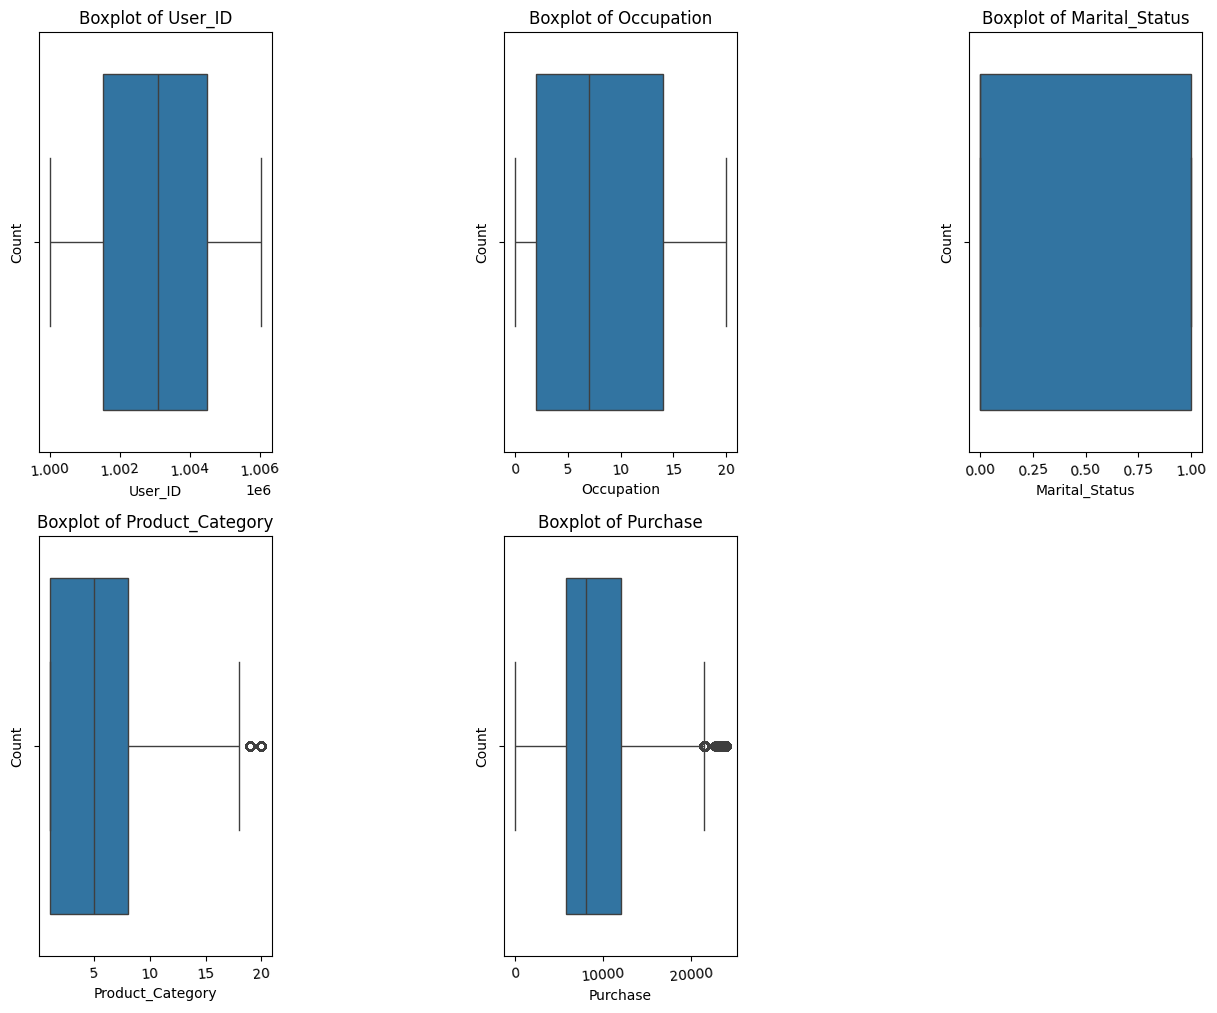

In [ ]:
plt.figure(figsize=(15,12))
j=0
for i in numerical_cols:
    j=j+1
    plt.subplot(2,3,j)
    plt.subplots_adjust(wspace=1, hspace=0.2)
    sns.boxplot(x=walmart_df[i])
    plt.title(f'Boxplot of {i}')
    plt.xticks(rotation=5)
    plt.xlabel(f'{i}')
    plt.ylabel('Count')

After checking the boxplots, we can see that only product_catgory and purchase has outliers. Lets treat the range and outliers values.


In [ ]:
r_whis_purchase= walmart_df['Purchase'].quantile(0.75)+1.5*(walmart_df['Purchase'].quantile(0.75) - walmart_df['Purchase'].quantile(0.25))
print(f"value or right whisker in Purchase feature = {r_whis_purchase}")
print("No of outliers in purchase column=",(walmart_df['Purchase']> r_whis_purchase).sum())

value or right whisker in Purchase feature = 21400.5
No of outliers in purchase column= 2677


In [ ]:
r_whis_product= walmart_df['Product_Category'].quantile(0.75)+1.5*(walmart_df['Product_Category'].quantile(0.75) - walmart_df['Product_Category'].quantile(0.25))
print(f"value or right whisker in Purchase feature = {r_whis_product}")
print("No of outliers in product category column=",(walmart_df['Product_Category']> r_whis_product).sum())

value or right whisker in Purchase feature = 18.5
No of outliers in product category column= 4153


In [ ]:
pd.crosstab( walmart_df['Age'],  walmart_df['Gender'],margins=True, margins_name='Total')

Gender,F,M,Total
Age,,,
0-17,5083,10019,15102
18-25,24628,75032,99660
26-35,50752,168835,219587
36-45,27170,82843,110013
46-50,13199,32502,45701
51-55,9894,28607,38501
55+,5083,16421,21504
Total,135809,414259,550068


In [ ]:
pd.crosstab( walmart_df['Marital_Status'],  walmart_df['Gender'], margins=True,margins_name='All')

Gender,F,M,All
Marital_Status,,,
0,78821,245910,324731
1,56988,168349,225337
All,135809,414259,550068


In [ ]:
# Probability that the customer is married
print("P(Married)=",(225337/550068))

#probability that a female customer is married
print("P(Married|Female)=",(56988/135809))
#probability that a male customer is married
print("P(Married|Male)=",(168349/414259))

P(Married)= 0.40965298835780306
P(Married|Female)= 0.41961872924474813
P(Married|Male)= 0.4063858600537345


# Visual Analysis

Here are the different plots
- Gender Distribution (Pie chart)
- Marital Status (Donut Chart)
- Age (Countplot)
- Purchase (Hist plot)
- Occupation (Piechart)
- Gender vs Marital Status (Stacked bar chart)
- City vs Purchase (Box Plot)

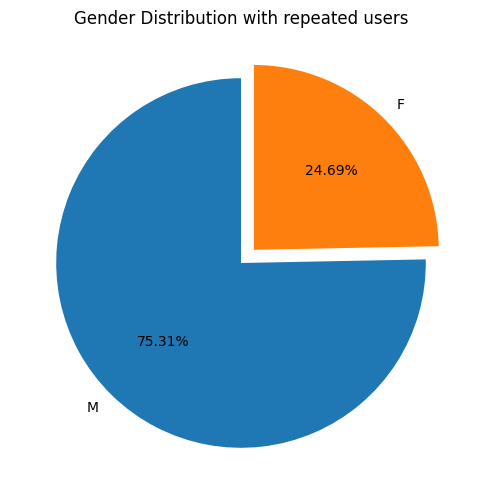

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(walmart_df['Gender'].value_counts(),labels=walmart_df['Gender'].value_counts().index,autopct='%1.2f%%',startangle= 90,explode=(0.0,0.1))
plt.title('Gender Distribution with repeated users')
plt.show()

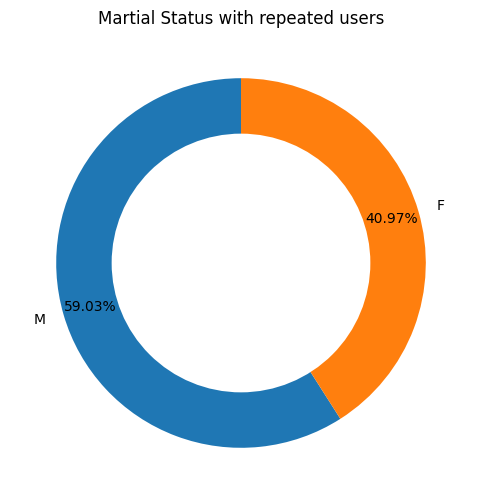

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(walmart_df['Marital_Status'].value_counts(),labels=walmart_df['Gender'].value_counts().index,autopct='%1.2f%%',startangle= 90, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Martial Status with repeated users')
plt.show()

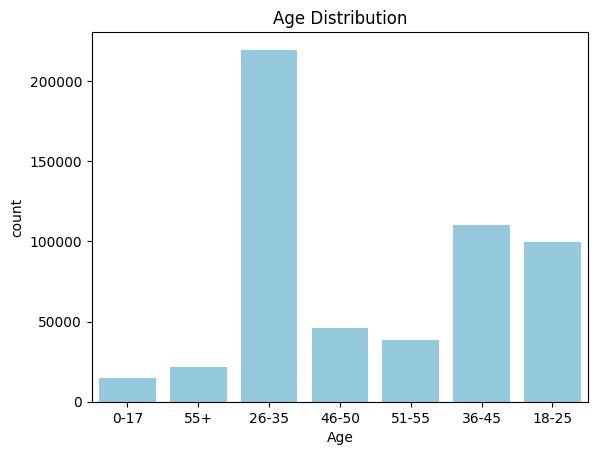

In [ ]:
sns.countplot(data=walmart_df,x='Age',hue_order='Age',color="skyblue")
plt.title('Age Distribution')
plt.show()

Text(0, 0.5, 'Count')

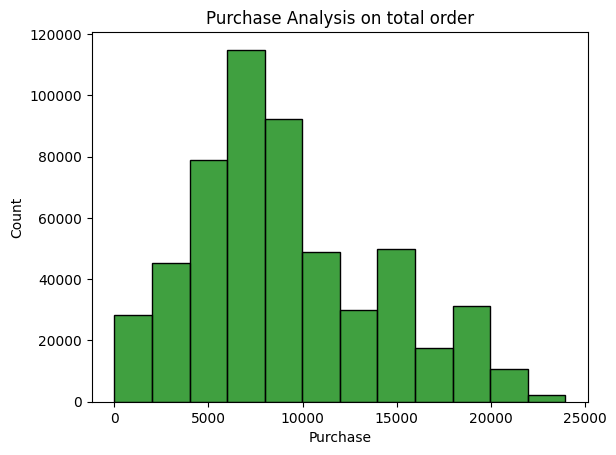

In [ ]:
sns.histplot(walmart_df['Purchase'],bins=12,color='g')
plt.title('Purchase Analysis on total order')
plt.ylabel('Count')

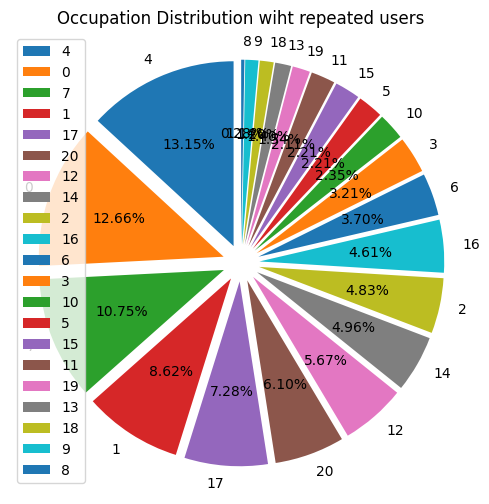

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(walmart_df['Occupation'].value_counts(),labels=walmart_df['Occupation'].value_counts().index,autopct='%1.2f%%',startangle= 90,explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Occupation Distribution wiht repeated users')
plt.legend()
plt.show()

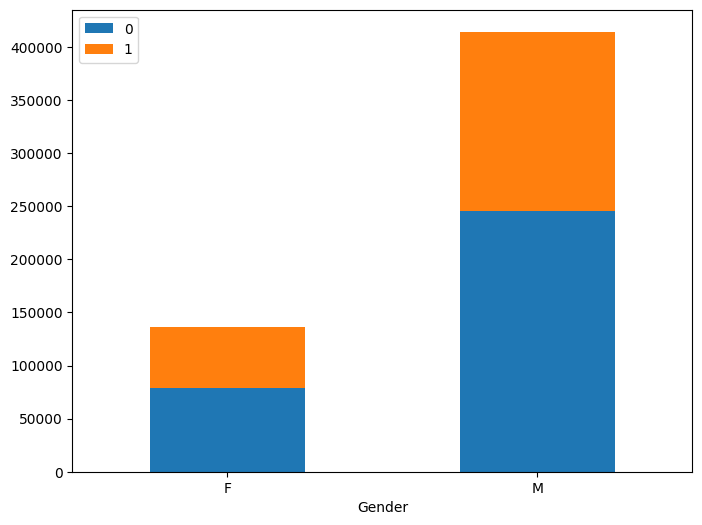

In [ ]:
df_stacked_plot= pd.crosstab(walmart_df['Gender'], walmart_df['Marital_Status'])
df_stacked_plot.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

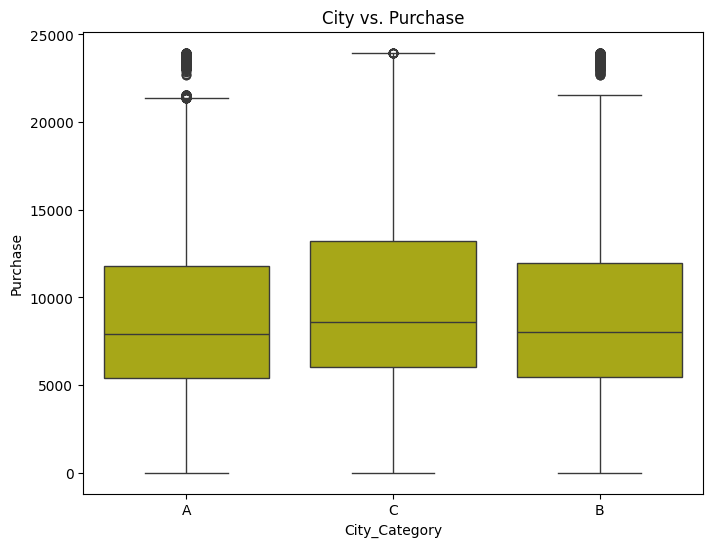

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='City_Category', y='Purchase', data=walmart_df,color='y')
plt.title('City vs. Purchase')
plt.show()

Insights from visual analysis
- In gender pie chart, we found out that 75% transactions are made by male users while only 25% are made from female users.
- From donut chart, we can see that 59% transactions are made by married users. This means that married purchase more variety of products than females.
- From Age distribution, we can see that most of the transactions are made from 26-35 agr group and that is the same age group with the highest purchasing amount.
- From the occupation pie chart, we can see that 35% of transactions are made by users following occupation 4,0,7.
- In Stacked bar chart, it is clearly visible that unmarried users are more in count to married users.
- The city bs purchase bar plot suggests that users from city C spent more than B and have less outliers. While the transactions made in City B and City A have small interquartile range with less mean and median vaalues than City C.

# Confidence Interval
Confidence Interval is a range where we are certain that true value exists.

## Confidence Interval using Random Sampling Technique
In this technique, we select some random data for multiple times from the given dataset and try to find the mean and the median for the dataset.

In [ ]:

#defining functions to define and print Confidence interval with different confidence levels
def confidence_interval(data, confidence_level):
  mean=np.mean(data)
  std=np.std(data)
  return norm.interval(confidence_level, loc=mean, scale=std)
def ci(data):
  print("Confidence Interval of 90% = ", confidence_interval(data,0.90))
  print("Confidence Interval of 95% = ", confidence_interval(data,0.95))
  print("Confidence Interval of 99% = ", confidence_interval(data,0.99))
  print("."*25)

### Gender Based Confidence Interval

In [ ]:
df_user_male=walmart_df[walmart_df["Gender"]=="M"]
df_user_female=walmart_df[walmart_df["Gender"]=="F"]
print("size of male user data",len(df_user_male))
print("size of female user data",len(df_user_female))

size of male user data 414259
size of female user data 135809


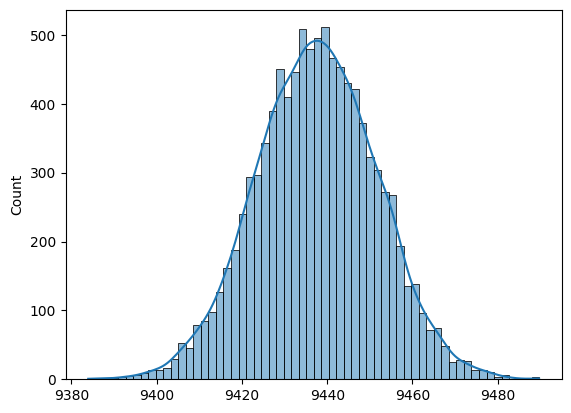

Confidence Interval for mean of male users
Confidence Interval of 90% =  (9414.384812991535, 9460.670116960468)
Confidence Interval of 95% =  (9409.951294274197, 9465.103635677806)
Confidence Interval of 99% =  (9401.286233436205, 9473.768696515797)
.........................


In [ ]:
sample_male_mean_purchase=[np.mean(df_user_male['Purchase'].sample(100000)) for i in range(10000)]
sns.histplot(sample_male_mean_purchase,kde=True)
plt.show()
print("Confidence Interval for mean of male users")
ci(sample_male_mean_purchase)

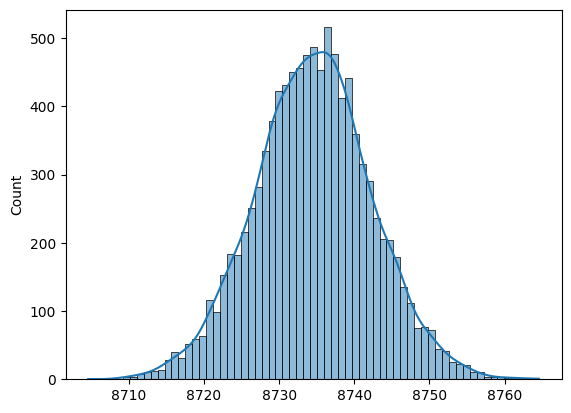

Confidence Interval for mean of female users
Confidence Interval of 90% =  (8721.80910344745, 8747.27654186455)
Confidence Interval of 95% =  (8719.36966035811, 8749.71598495389)
Confidence Interval of 99% =  (8714.601907219445, 8754.483738092555)
.........................


In [ ]:
sample_female_mean_purchase=[np.mean(df_user_female['Purchase'].sample(100000)) for i in range(10000)]
sns.histplot(sample_female_mean_purchase,kde=True)
plt.show()
print("Confidence Interval for mean of female users")
ci(sample_female_mean_purchase)

According to the available data, we have tried to predict the interval for mean using a random sample of 100000 (1 lakh).

- It is found that the interval for males is larger than the intervals in females.
-  Also it is found that the mean for females is approximately 580 lesser than the mean for males.

## Confidence Interval using Bootstrapping
Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples.


In [ ]:
# this function will process and plot the mean and median for the given dataframe
def ci_using_bootstrap(d,t):
    plt.figure(figsize=(10,5))
    plt.suptitle(t)
    boot_mean, boot_median= bootstrapping(d)

    plt.subplot(1,2,1)
    mean_hist(boot_mean)

    plt.subplot(1,2,2)
    median_hist(boot_median)
    plt.show()

    print("Confidence Intervals for mean calculation")
    ci(boot_mean)

    print("Confidence Intervals for median calculation")
    ci(boot_median)

# bootstrapping values for 5 million data and returning the mean and the median
def bootstrapping(data):
  bootstrapped_median=[]
  bootstrapped_mean=[]
  for reps in range(1000):
    bootstrapped_sample=np.random.choice(data["Purchase"],size=5000000)
    bootstrapped_median.append(np.median(bootstrapped_sample))
    bootstrapped_mean.append(np.mean(bootstrapped_sample))
  return (bootstrapped_mean, bootstrapped_median)

# drawing plots with all the details

def mean_hist(data):
  sns.histplot(data,kde= True)
  plt.subplots_adjust(wspace=1, hspace=0.2)
  plt.title(f'KDE Plot for Mean Sample')
  plt.xticks(rotation=5)
  plt.xlabel("Purchase Value")
  plt.ylabel('Mean Count')

def median_hist(data):
  sns.histplot(data,kde= True)
  plt.subplots_adjust(wspace=1, hspace=0.2)
  plt.title(f'KDE Plot for Median Sample')
  plt.xticks(rotation=5)
  plt.xlabel("Purchase Value")
  plt.ylabel('Median Count')

### Gender

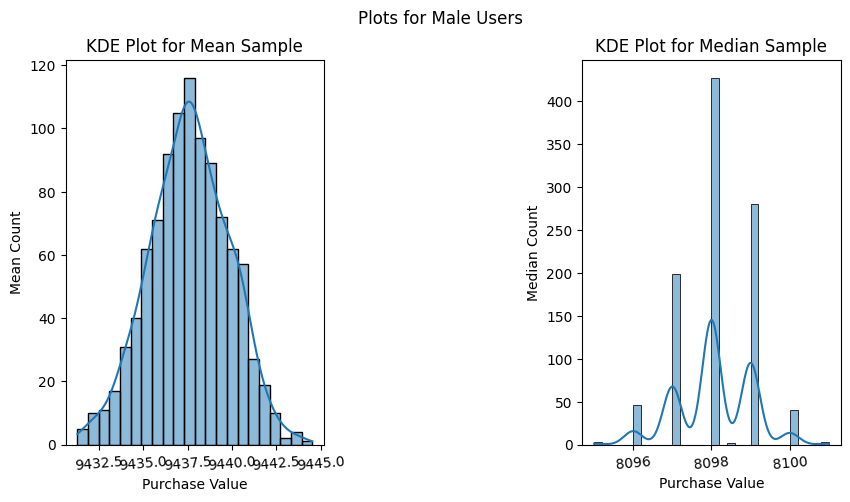

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9433.92852905488, 9441.293328212723)
Confidence Interval of 95% =  (9433.223078898656, 9441.998778368947)
Confidence Interval of 99% =  (9431.844316585566, 9443.377540682037)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8096.533491875048, 8099.606508124952)
Confidence Interval of 95% =  (8096.239137643913, 8099.900862356087)
Confidence Interval of 99% =  (8095.663838996647, 8100.476161003352)
.........................


In [ ]:
ci_using_bootstrap(df_user_male,"Plots for Male Users" )

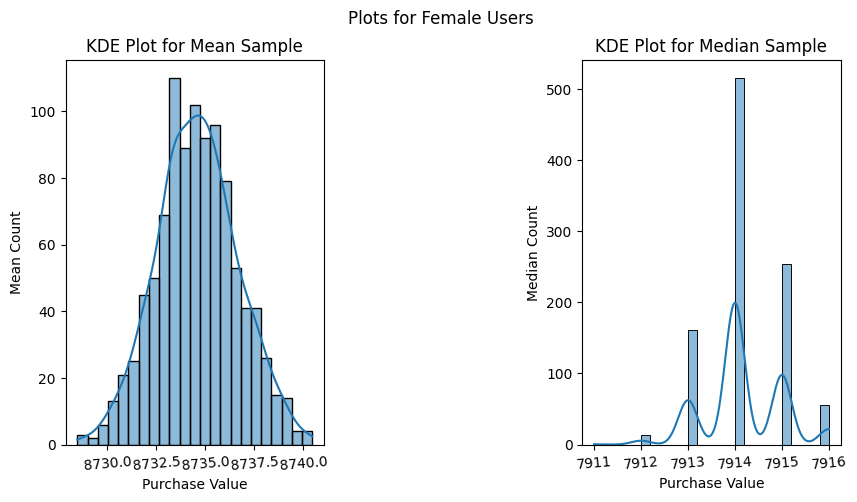

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (8731.212456155936, 8737.979942940463)
Confidence Interval of 95% =  (8730.564220609105, 8738.628178487294)
Confidence Interval of 99% =  (8729.297281004525, 8739.895118091874)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (7912.823547207869, 7915.522452792131)
Confidence Interval of 95% =  (7912.565027820544, 7915.780972179456)
Confidence Interval of 99% =  (7912.059766342747, 7916.2862336572525)
.........................


In [ ]:
ci_using_bootstrap(df_user_female,"Plots for Female Users" )

The difference between the mean and the median interval is large indicating the plots are left skewed. This shows that more purchases are made from lower amounts lesser than the average. But at the same time the overall purchase amount is bigger.


### Marital Status


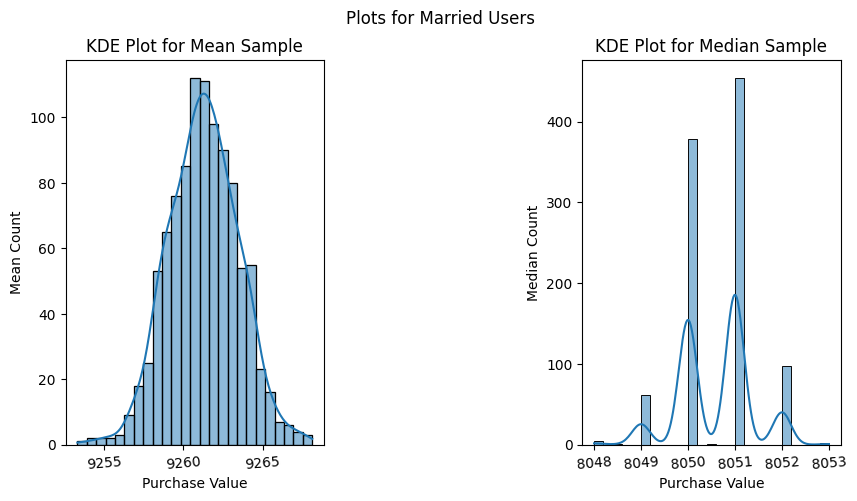

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9257.68921194703, 9264.872780752166)
Confidence Interval of 95% =  (9257.001121256813, 9265.560871442383)
Confidence Interval of 99% =  (9255.656287035305, 9266.905705663892)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8049.308488666789, 8051.861511333211)
Confidence Interval of 95% =  (8049.063942929659, 8052.106057070341)
Confidence Interval of 99% =  (8048.5859921585, 8052.5840078415)
.........................


In [ ]:
ci_using_bootstrap(walmart_df[walmart_df['Marital_Status']==1],"Plots for Married Users")

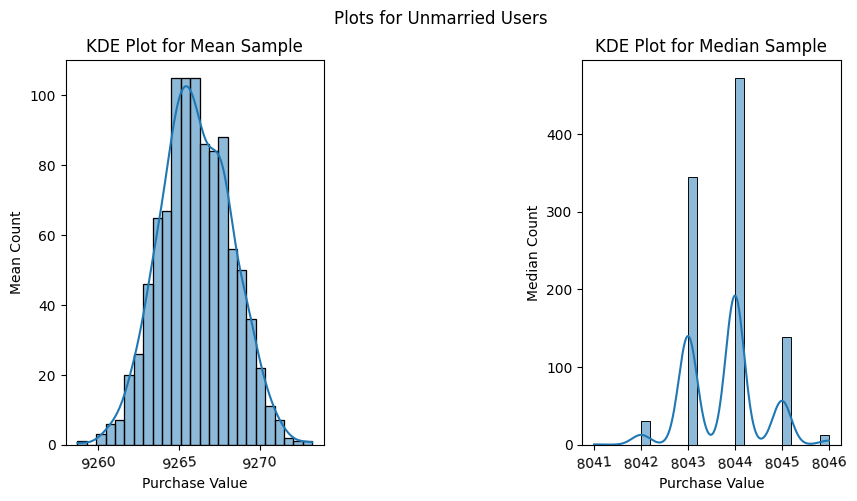

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9262.453114513817, 9269.644303477784)
Confidence Interval of 95% =  (9261.764293913373, 9270.333124078228)
Confidence Interval of 99% =  (9260.418033123726, 9271.679384867875)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8042.472946691579, 8045.039053308422)
Confidence Interval of 95% =  (8042.227147685395, 8045.284852314606)
Confidence Interval of 99% =  (8041.746747470963, 8045.765252529038)
.........................


In [ ]:
ci_using_bootstrap(walmart_df[walmart_df['Marital_Status']==0],"Plots for Unmarried Users")

Through these plots, we can observe that the mean and median values have a slight difference. This tells that the purchasing style for both married and unmarried doesn't have musch difference.

### Marital Status and Gender

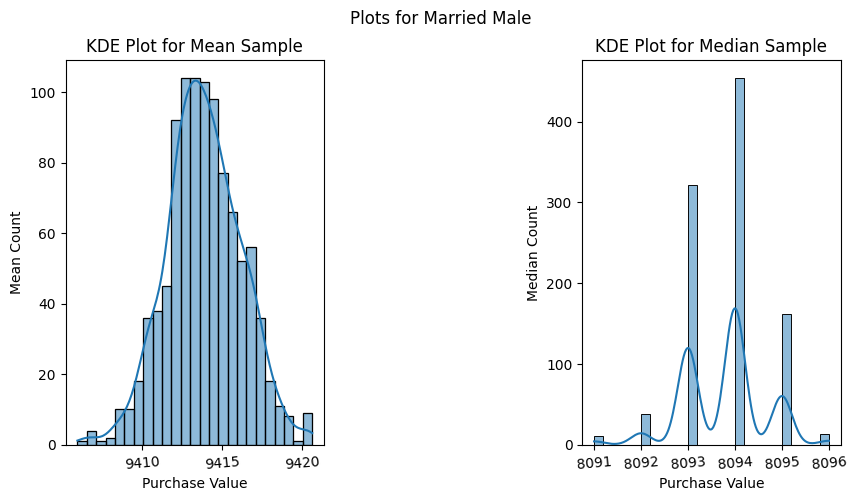

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9410.04984102865, 9417.686798918552)
Confidence Interval of 95% =  (9409.318321672718, 9418.418318274484)
Confidence Interval of 99% =  (9407.888608587597, 9419.848031359605)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8092.353610152896, 8095.160389847103)
Confidence Interval of 95% =  (8092.084757855458, 8095.429242144542)
Confidence Interval of 99% =  (8091.559301290984, 8095.954698709015)
.........................


In [ ]:
ci_using_bootstrap(df_user_male[df_user_male["Marital_Status"]==1],"Plots for Married Male")

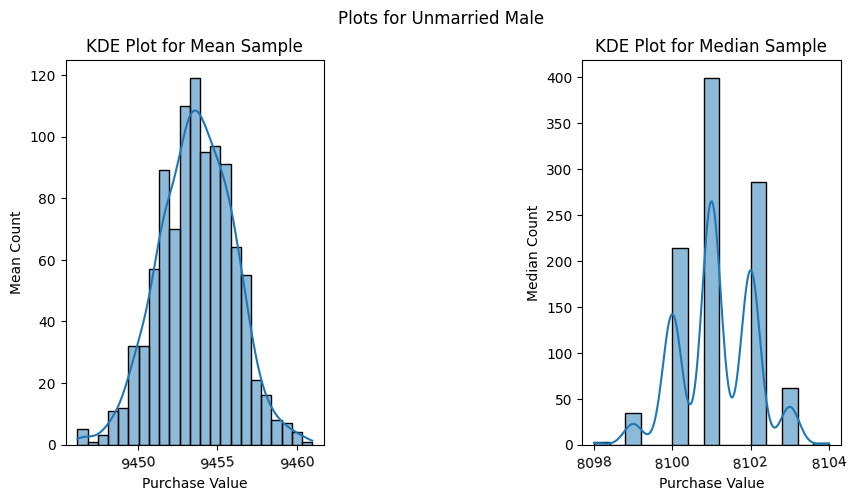

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9449.861048953695, 9457.486332064705)
Confidence Interval of 95% =  (9449.130647886861, 9458.21673313154)
Confidence Interval of 99% =  (9447.703120434342, 9459.644260584058)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8099.55300262329, 8102.69699737671)
Confidence Interval of 95% =  (8099.25184959217, 8102.99815040783)
Confidence Interval of 99% =  (8098.663263076006, 8103.586736923994)
.........................


In [ ]:
ci_using_bootstrap(df_user_male[df_user_male["Marital_Status"]==0],"Plots for Unmarried Male")

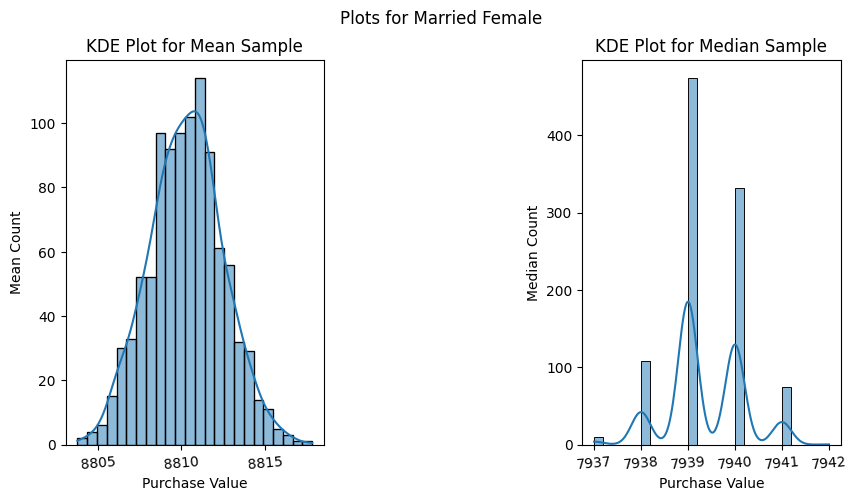

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (8806.673657620542, 8813.909936248258)
Confidence Interval of 95% =  (8805.980518027865, 8814.603075840934)
Confidence Interval of 99% =  (8804.625816012905, 8815.957777855894)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (7938.019145382487, 7940.694854617513)
Confidence Interval of 95% =  (7937.762847898007, 7940.951152101993)
Confidence Interval of 99% =  (7937.261929003279, 7941.452070996721)
.........................


In [ ]:
ci_using_bootstrap(df_user_female[df_user_female["Marital_Status"]==1],"Plots for Married Female")

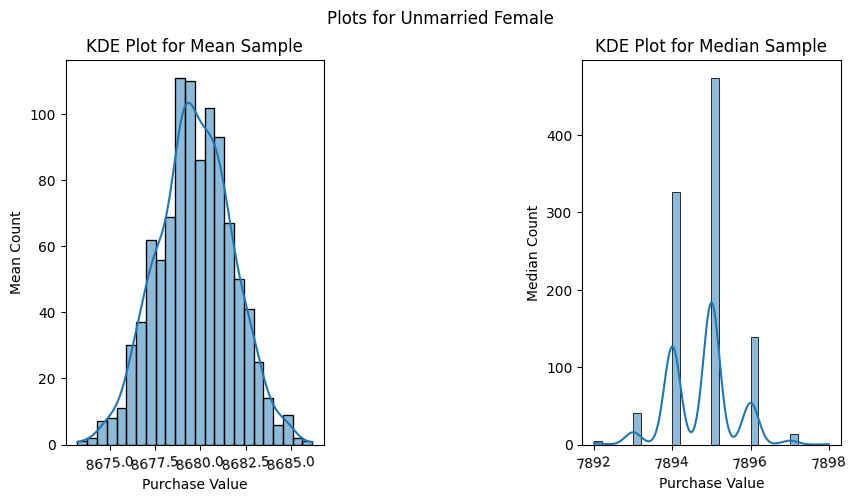

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (8676.32877169584, 8683.100851847757)
Confidence Interval of 95% =  (8675.680096165286, 8683.749527378312)
Confidence Interval of 99% =  (8674.412296637482, 8685.017326906116)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (7893.397163155239, 7896.090836844761)
Confidence Interval of 95% =  (7893.139144914094, 7896.348855085906)
Confidence Interval of 99% =  (7892.634862898077, 7896.853137101923)
.........................


In [ ]:
ci_using_bootstrap(df_user_female[df_user_female["Marital_Status"]==0],"Plots for Unmarried Female")

It is noticable that the purchasing pattern for married male users is dfiferent from that of purchasing pattern of unmarried males. We can also observe the same for female users. Therefore it is indicative that purchasing style differs with difference in marital status for each gender.

### City

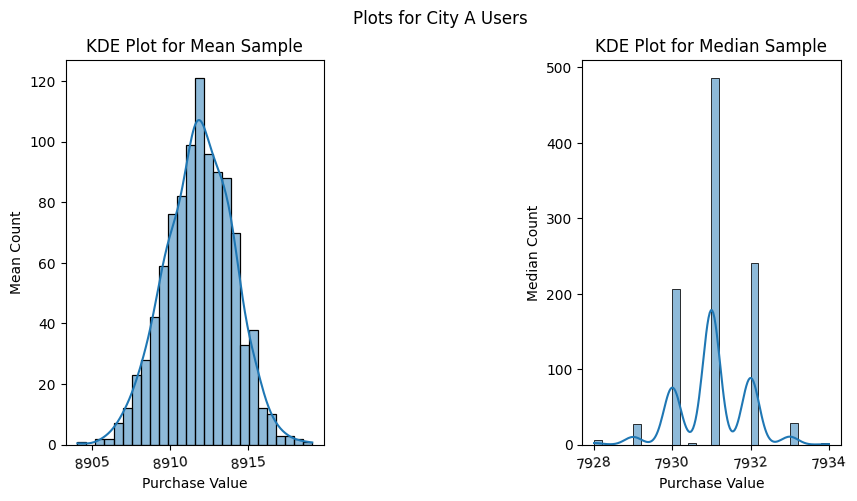

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (8908.30035275608, 8915.438305630323)
Confidence Interval of 95% =  (8907.616631467512, 8916.12202691889)
Confidence Interval of 99% =  (8906.280336993665, 8917.458321392738)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (7929.602439118818, 7932.445560881182)
Confidence Interval of 95% =  (7929.330105732878, 7932.717894267123)
Confidence Interval of 99% =  (7928.797845578398, 7933.250154421603)
.........................


In [ ]:
ci_using_bootstrap(walmart_df[walmart_df["City_Category"]=='A'],"Plots for City A Users")

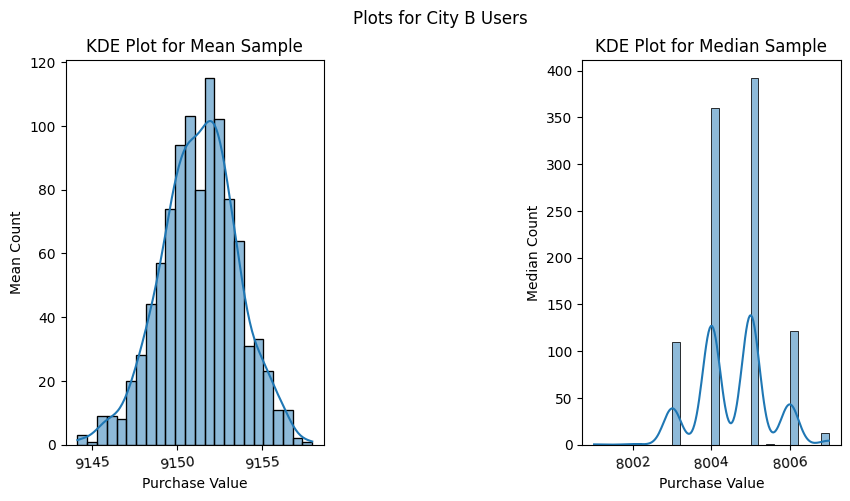

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9147.645498363347, 9154.993162661855)
Confidence Interval of 95% =  (9146.941689499567, 9155.696971525635)
Confidence Interval of 99% =  (9145.56613499945, 9157.072526025751)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8003.078365167071, 8006.0346348329285)
Confidence Interval of 95% =  (8002.795193711486, 8006.317806288514)
Confidence Interval of 99% =  (8002.241751164683, 8006.871248835317)
.........................


In [ ]:
ci_using_bootstrap(walmart_df[walmart_df["City_Category"]=='B'],"Plots for City B Users")

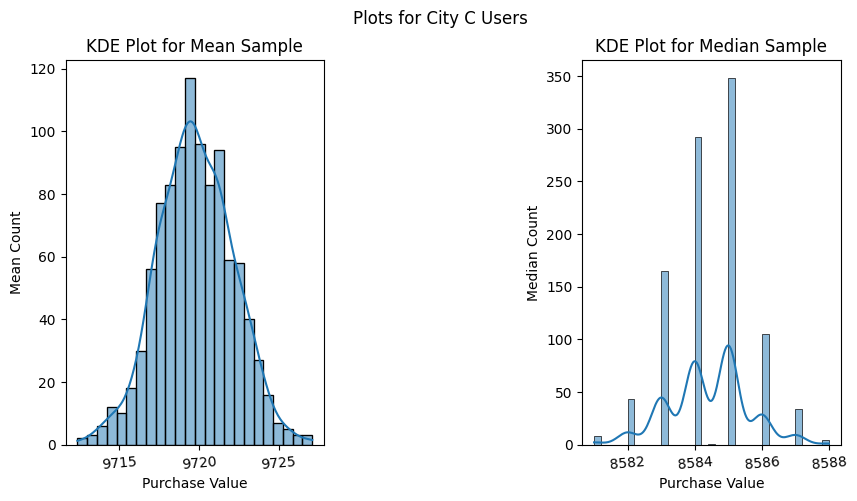

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9715.93209216745, 9723.66053145295)
Confidence Interval of 95% =  (9715.191810106193, 9724.400813514207)
Confidence Interval of 99% =  (9713.744970810581, 9725.847652809818)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8582.465005120823, 8586.337994879177)
Confidence Interval of 95% =  (8582.094024029348, 8586.708975970652)
Confidence Interval of 99% =  (8581.368962530269, 8587.434037469731)
.........................


In [ ]:
ci_using_bootstrap(walmart_df[walmart_df["City_Category"]=='C'],"Plots for City C Users")

We found out that the users from city C have purchased more products than the other cities.

### Age

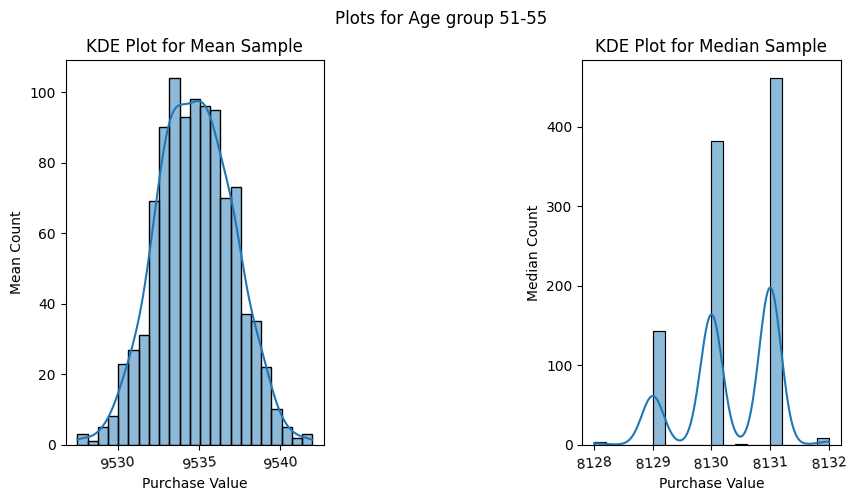

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9530.943202018349, 9538.604927499655)
Confidence Interval of 95% =  (9530.209310255397, 9539.338819262606)
Confidence Interval of 99% =  (9528.774960435332, 9540.773169082671)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8129.110488665838, 8131.546511334162)
Confidence Interval of 95% =  (8128.877149977966, 8131.779850022033)
Confidence Interval of 99% =  (8128.421102748852, 8132.235897251147)
.........................


In [ ]:
ci_using_bootstrap(walmart_df[walmart_df["Age"]=='51-55'],"Plots for Age group 51-55")

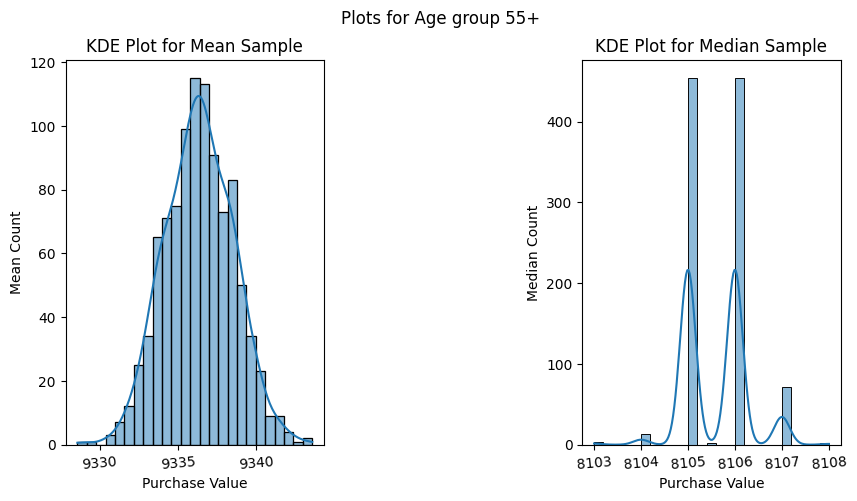

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9332.775631462864, 9339.943090461933)
Confidence Interval of 95% =  (9332.08908387857, 9340.629638046226)
Confidence Interval of 99% =  (9330.747265570055, 9341.971456354742)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8104.492321992893, 8106.679678007107)
Confidence Interval of 95% =  (8104.282802274993, 8106.889197725008)
Confidence Interval of 99% =  (8103.873307871538, 8107.298692128463)
.........................


In [ ]:
ci_using_bootstrap(walmart_df[walmart_df["Age"]=='55+'],"Plots for Age group 55+")

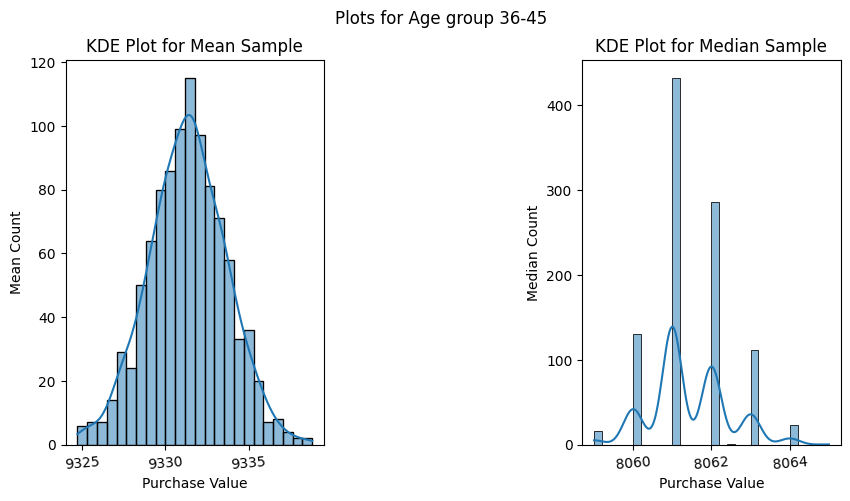

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9327.511669617928, 9335.163190178871)
Confidence Interval of 95% =  (9326.778755351106, 9335.896104445694)
Confidence Interval of 99% =  (9325.346315991776, 9337.328543805024)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8059.798479363671, 8063.04252063633)
Confidence Interval of 95% =  (8059.487743201889, 8063.353256798111)
Confidence Interval of 99% =  (8058.8804270004575, 8063.960572999543)
.........................


In [ ]:
ci_using_bootstrap(walmart_df[walmart_df["Age"]=='36-45'],"Plots for Age group 36-45")

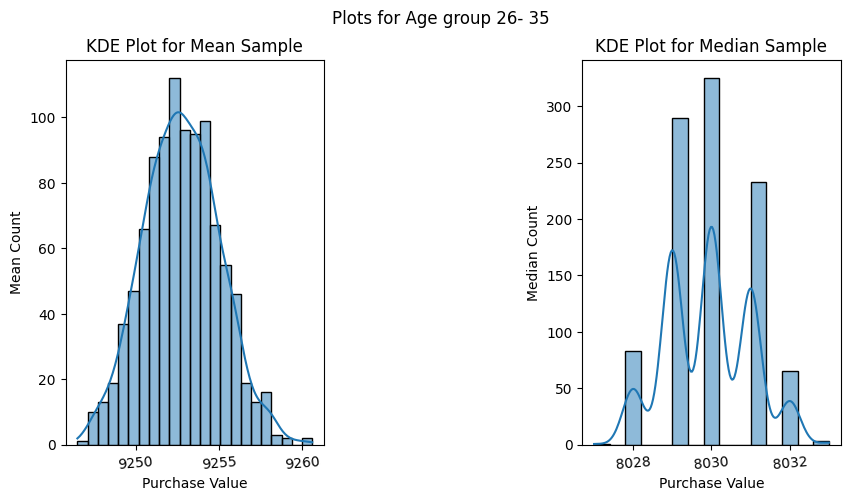

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9249.014239863782, 9256.500489155818)
Confidence Interval of 95% =  (9248.29715639424, 9257.21757262536)
Confidence Interval of 99% =  (9246.895657430176, 9258.619071589424)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8028.154136089044, 8031.671863910955)
Confidence Interval of 95% =  (8027.817184382918, 8032.008815617081)
Confidence Interval of 99% =  (8027.1586313871585, 8032.667368612841)
.........................


In [ ]:
ci_using_bootstrap(walmart_df[walmart_df["Age"]=='26-35'],"Plots for Age group 26- 35")

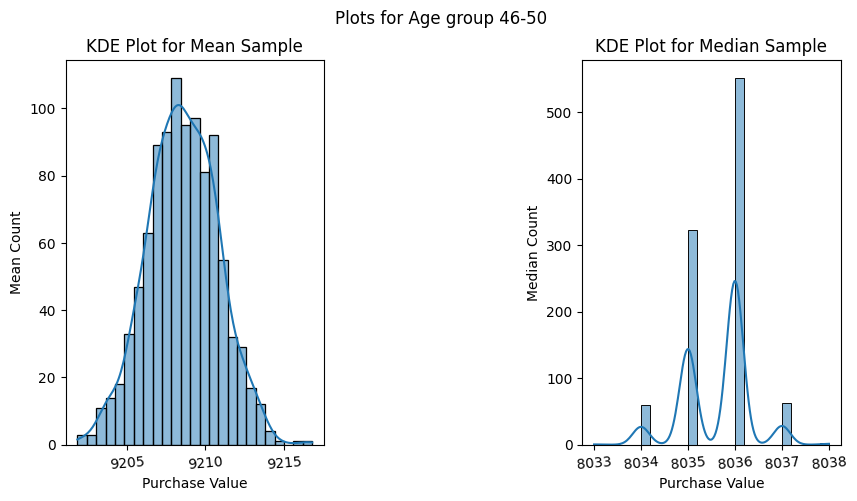

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9204.876969926037, 9212.249970669563)
Confidence Interval of 95% =  (9204.170734166599, 9212.956206429002)
Confidence Interval of 99% =  (9202.790436436588, 9214.336504159013)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8034.45554710836, 8036.792452891639)
Confidence Interval of 95% =  (8034.231702504515, 8037.016297495485)
Confidence Interval of 99% =  (8033.794210924069, 8037.45378907593)
.........................


In [ ]:
ci_using_bootstrap(walmart_df[walmart_df["Age"]=='46-50'],"Plots for Age group 46-50")

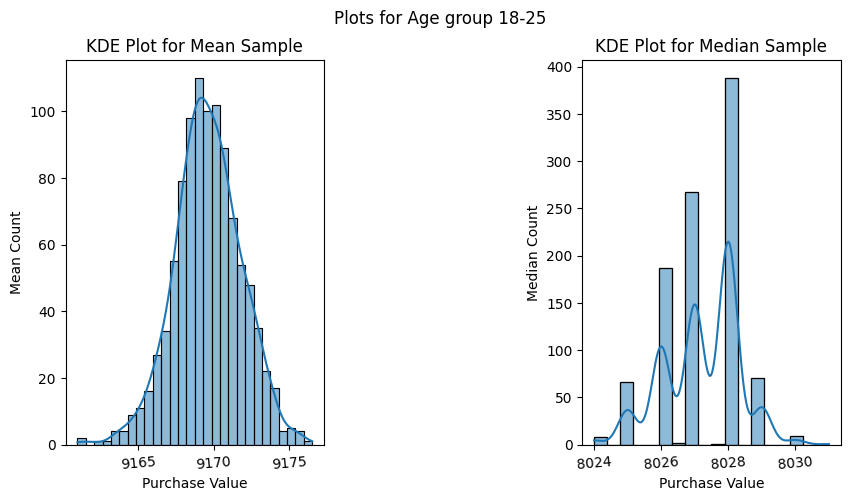

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (9166.009248891325, 9173.230571144275)
Confidence Interval of 95% =  (9165.317541921142, 9173.922278114458)
Confidence Interval of 99% =  (9163.965639885573, 9175.274180150027)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (8025.381852379878, 8029.053147620121)
Confidence Interval of 95% =  (8025.0301909502505, 8029.404809049749)
Confidence Interval of 99% =  (8024.34288863433, 8030.09211136567)
.........................


In [ ]:
ci_using_bootstrap(walmart_df[walmart_df["Age"]=='18-25'],"Plots for Age group 18-25")

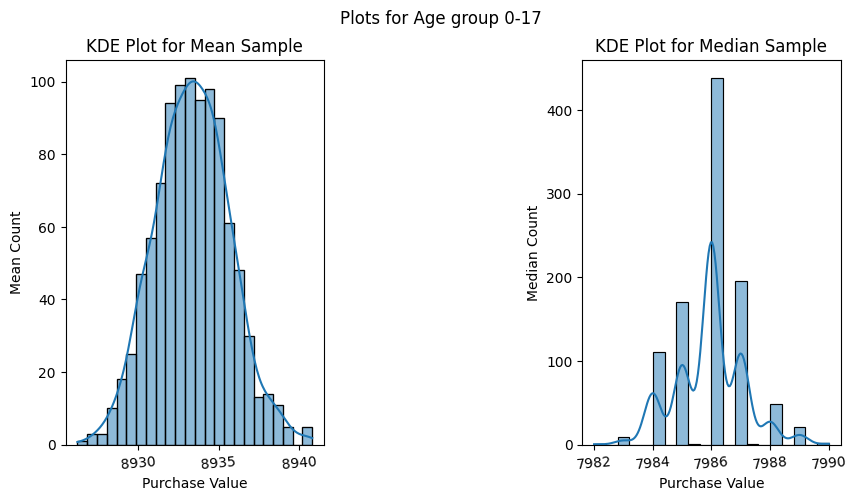

Confidence Intervals for mean calculation
Confidence Interval of 90% =  (8929.574452259803, 8937.188451854996)
Confidence Interval of 95% =  (8928.845132004248, 8937.917772110552)
Confidence Interval of 99% =  (8927.419716936065, 8939.343187178734)
.........................
Confidence Intervals for median calculation
Confidence Interval of 90% =  (7984.049248699081, 7987.834751300919)
Confidence Interval of 95% =  (7983.686647717762, 7988.197352282238)
Confidence Interval of 99% =  (7982.977964668617, 7988.9060353313835)
.........................


In [ ]:
ci_using_bootstrap(walmart_df[walmart_df["Age"]=='0-17'],"Plots for Age group 0-17")

# Insights:
- It is found that the difference in mean and median values is very large for any feature. This indicates that the purchase curve is left skewed and the transactions for higher purchase values is less in count.
- All of the graphs are left skewed.
- Most of the transactions are made for the products ranging 5000 to 10000.
- Occupation plays an important role in the users purchasing style. We can see that certain types of occupation has more users purchasing products.
- Noticingly, the users have purchased most of the products from the product category of 1 and 5.
- The number of transactions are higher fromthe age group of 26-35 but thre highest average purchasing price is from 55+. That means the age group 26-35 purchase a variety of products but for less price. The same is true for 18-25 age group.

# Recommendations
- It seems like that there are less variety of female products available. Enrich the varety of products for female customers.
- It is also noticed that certain occupations have made only a few percentage of transactions. We can check if they didn't found the variety they needed pr there is some different problem.
- It is recommended to run campiagns in city A and city B to grab users attention and increase sales.
- It is better to spread awareness for products of other categories than 1 and 5. Also maintain a high stock for these two categories so that there is high profits from these two categories.
- There are too many potential customers seen from age froup 18-25. It is better to be variety of cheaper product to increase the sales.